In [63]:
!pip install tensorflow opencv-contrib-python youtube-dl moviepy pydot

In [64]:
!pip install pafy

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Import the required libraries.
import os
from os import path
import cv2
import pafy
import math
import random
import numpy as np
import pandas as pd
from keras.saving import load_model
import moviepy.editor as mp

In [67]:
#loading created model
convlstm_model = load_model('/content/convlstm_model___Date_Time_2024_02_23__07_39_38___Loss_0.7323020100593567___Accuracy_0.75.keras')

In [68]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 20

DATASET_DIR = '/content/dataset'

CLASSES_LIST = ["goal", "happy", "losses"]

In [69]:
# Getting the test Video's path .
file_path = '/content/drive/MyDrive/Football analysis videos ICT/Giroud header wins it! _ England v France _ FIFA World Cup Qatar 2022.mp4'

In [70]:
reader = cv2.VideoCapture(file_path)

In [71]:
fps_org = reader.get(cv2.CAP_PROP_FPS)

In [72]:
frames_list = []

In [73]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

In [74]:
dim = (IMAGE_HEIGHT , IMAGE_WIDTH)

In [75]:
ret = True

In [76]:
while ret:
  ret , img = reader.read()
  if not ret:
    break
  image = cv2.resize(img,dim)
  norm = image / 255
  arr = np.array(norm)
  frames_list.append(arr)

In [77]:
reader.release()

In [78]:
frames_list[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.01568627],
        [0.        , 0.        , 0.04705882]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.00392157],
        [0.00392157, 0.        , 0.01568627]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.01176471]],

       ...,

       [[0.01568627, 0.10980392, 0.10196078],
        [0.05098039, 0.0627451 , 0.08235294],
        [0.10196078, 0

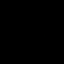

In [79]:
from google.colab.patches import cv2_imshow
cv2_imshow(frames_list[2445])

In [80]:
len(frames_list)

3193

Preprocessing the test video

In [81]:
''' As you can see the clips we preprocessed and fed into our convlstm2D model were short clips of 20 frames each
    They were 20 frames chosen at equal intervals from clips of around 2 secs
    (in 2 seconds at 30 fps of the original video it would mean 60 frames per video clip)'''

' As you can see the clips we preprocessed and fed into our convlstm2D model were short clips of 20 frames each\n    They were 20 frames chosen at equal intervals from clips of around 2 secs\n    (in 2 seconds at 30 fps of the original video it would mean 60 frames per video clip)'

In [82]:
#thus we are preparing clips of 60 frames each(converted to 20 frames like above)

In [83]:
#we will be running our model on each of these clips and locating where an event happened.

In [84]:
#a confidence threshold of 0.7 is added to locate only moments where the model is very sure an event happened

In [85]:
frame_limit = 60

In [86]:
tmp_lst =[]

In [87]:
for i in range(math.floor(len(frames_list)/frame_limit)):
  tmp_lst.append(frames_list[i*frame_limit:(i+1)*frame_limit])

In [88]:
len(tmp_lst)

53

In [89]:
len(tmp_lst[0])

60

In [90]:
sequence_length = 20

In [91]:
frame_skipper = frame_limit/sequence_length

In [92]:
preprocessed_clips_list = []

In [93]:
for i in range(len(tmp_lst)):
  frame_lst = []
  for k in range(len(tmp_lst[i])):
    if k%frame_skipper==0:
      frame_lst.append(tmp_lst[i][k])
  arr1 = np.array(frame_lst)
  preprocessed_clips_list.append(arr1)

In [94]:
preprocessed_clips_list[0].shape

(20, 64, 64, 3)

In [95]:
len(preprocessed_clips_list)

53

In [96]:
preprocessed_clips_list[0].shape

(20, 64, 64, 3)

In [97]:
predictions = []
confidence = []

In [98]:
for i in range(len(preprocessed_clips_list)):
  predicted_labels_probabilities = convlstm_model.predict(np.expand_dims(preprocessed_clips_list[i], axis = 0))[0]
  predicted_label = np.argmax(predicted_labels_probabilities)
  confidence.append(predicted_labels_probabilities[predicted_label])
  predictions.append(predicted_label)


1/1 [==============================] - 0s 208ms/step


In [99]:
predicted_labels_probabilitiesww = convlstm_model.predict(np.expand_dims(preprocessed_clips_list[0], axis = 0))[0]

1/1 [==============================] - 0s 152ms/step


In [100]:
predicted_labels_probabilitiesww

array([0.05974389, 0.3231769 , 0.6170792 ], dtype=float32)

In [101]:
predictions[0]

2

In [102]:
confidence

[0.6170792,
 0.5535761,
 0.8230119,
 0.8280055,
 0.81057185,
 0.43727013,
 0.8286647,
 0.6188945,
 0.5872106,
 0.84126836,
 0.83376473,
 0.63033587,
 0.533908,
 0.7144489,
 0.8173551,
 0.6478601,
 0.46958825,
 0.87327075,
 0.8759422,
 0.51678497,
 0.65100884,
 0.8133298,
 0.8316135,
 0.66230375,
 0.6520343,
 0.38579866,
 0.61577094,
 0.76442116,
 0.5772628,
 0.83386827,
 0.8080626,
 0.8086395,
 0.8645586,
 0.8206211,
 0.7840978,
 0.44404685,
 0.5517215,
 0.66016775,
 0.60704625,
 0.8737,
 0.8627265,
 0.47346562,
 0.46325168,
 0.810584,
 0.79120654,
 0.7380958,
 0.8323524,
 0.45203394,
 0.58360744,
 0.7727754,
 0.737381,
 0.7201914,
 0.71135885]

In [103]:
conf_arr = np.array(confidence)

In [104]:
#locating clips where an event is predicted with more than 0.7 confidence

In [105]:
indices = np.where(conf_arr>0.7)[0]

In [106]:
indices #array of clip indices where an even happened above 0.7 confidence

array([ 2,  3,  4,  6,  9, 10, 13, 14, 17, 18, 21, 22, 27, 29, 30, 31, 32,
       33, 34, 39, 40, 43, 44, 45, 46, 49, 50, 51, 52])

In [107]:
event_label = np.array(predictions) #creating an array of predictions

In [108]:
event_label.shape

(53,)

In [109]:
indices.shape

(29,)

In [110]:
labels_of_events = np.take(event_label,indices) #creating a sorted array with predictions corresponding to an event

In [111]:
labels_of_events.shape

(29,)

In [112]:
#creating a dataframe with clip index and its corresponding prediction label

In [113]:
df = pd.DataFrame(indices,columns=['event_index'])

In [114]:
df['predictions'] = labels_of_events

In [115]:
df

,event_index,predictions
0,2,0
1,3,0
2,4,0
3,6,1
4,9,0
5,10,0
6,13,0
7,14,0
8,17,0
9,18,0


In [116]:
fps_org #fps of original test video

25.0

In [117]:
'''
keywords;
index_no: index of clip where the event happened
frame_limit: 60 (no of frames of original video we clubbed together)
fps_org: fps of the original test video

Thus the time(in sec) of the event clip in the original video
based on the index no of clip would be;

moment = index_no*frame_limit/fps_org'''

'\nkeywords;\nindex_no: index of clip where the event happened\nframe_limit: 60 (no of frames of original video we clubbed together)\nfps_org: fps of the original test video\n\nThus the time(in sec) of the event clip in the original video\nbased on the index no of clip would be;\n\nmoment = index_no*frame_limit/fps_org'

In [118]:
'''
Thus we can extract a clip using moviepy,
 starting 5 secs before the event moment and
 ending 5 secs after the event moment;
by defining the below variables:

start_time = moment - 5
end_time = moment + 5

 '''

'\nThus we can extract a clip using moviepy,\n starting 5 secs before the event moment and\n ending 5 secs after the event moment;\nby defining the below variables:\n\nstart_time = moment - 5\nend_time = moment + 5\n\n '

In [119]:
max_time = len(frames_list)/fps_org #ending time of the original test video

Video Extraction using Moviepy

In [120]:
#creating a folder for storing 3 class folders
os.mkdir('/content/classified_moments')

In [121]:
# creating folders for storing clips of each corresponding classes

os.mkdir('/content/classified_moments/Goal')
os.mkdir('/content/classified_moments/Happy')
os.mkdir('/content/classified_moments/Loss')

In [122]:
df.head(8)

,event_index,predictions
0,2,0
1,3,0
2,4,0
3,6,1
4,9,0
5,10,0
6,13,0
7,14,0


In [123]:
'''
To prevent value error;
 in case the starting time(moment -5 sec) is less than the begining of the original test video
 or
 in case the ending time(moment + 5 sec) is greater than the ending time of the original test video,
 I have written the extraction part as below
 '''

'\nTo prevent value error;\n in case the starting time(moment -5 sec) is less than the begining of the original test video\n or\n in case the ending time(moment + 5 sec) is greater than the ending time of the original test video,\n I have written the extraction part as below\n '

In [124]:
for i in range(len(df['predictions'])):
  index = df['event_index'][i]
  moment = index*frame_limit/fps_org
  start_time = moment - 5
  end_time = moment + 5
  clip = mp.VideoFileClip(file_path)
  if df['predictions'][i] == 0:
  # Create a cropped subclip that starts at {start_time} seconds and ends at {end_time} seconds if event is Goal
    # Create a cropped subclip after checking for out of time extractions
    if start_time < 0:
      start_time = 0
      cropped_clip = clip.subclip(start_time, end_time)
      cropped_clip.write_videofile(f"/content/classified_moments/Goal/goal{i}.mp4")
    if end_time > max_time:
      end_time = max_time
      cropped_clip = clip.subclip(start_time, end_time)
      cropped_clip.write_videofile(f"/content/classified_moments/Goal/goal{i}.mp4")
    else:
      cropped_clip = clip.subclip(start_time, end_time)
      cropped_clip.write_videofile(f"/content/classified_moments/Goal/goal{i}.mp4")
  if df['predictions'][i] == 1:
  # Create a cropped subclip that starts at {start_time} seconds and ends at {end_time} seconds if event is Happy
    if start_time < 0:
      start_time = 0
      cropped_clip = clip.subclip(start_time, end_time)
      cropped_clip.write_videofile(f"/content/classified_moments/Happy/happy{i}.mp4")
    if end_time > max_time:
      end_time = max_time
      cropped_clip = clip.subclip(start_time, end_time)
      cropped_clip.write_videofile(f"/content/classified_moments/Happy/happy{i}.mp4")
    else:
      cropped_clip = clip.subclip(start_time, end_time)
      cropped_clip.write_videofile(f"/content/classified_moments/Happy/happy{i}.mp4")
  if df['predictions'][i] == 2:
  # Create a cropped subclip that starts at {start_time} seconds and ends at {end_time} seconds if event is Loss
    if start_time < 0:
      start_time = 0
      cropped_clip = clip.subclip(start_time, end_time)
      cropped_clip.write_videofile(f"/content/classified_moments/Loss/loss{i}.mp4")
    if end_time > max_time:
      end_time = max_time
      cropped_clip = clip.subclip(start_time, end_time)
      cropped_clip.write_videofile(f"/content/classified_moments/Loss/loss{i}.mp4")
    else:
      cropped_clip = clip.subclip(start_time, end_time)
      cropped_clip.write_videofile(f"/content/classified_moments/Loss/loss{i}.mp4")

t:  45%|████▌     | 113/250 [03:24<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal0.mp4.
MoviePy - Writing audio in goal0TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [03:24<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal0.mp4




t:  45%|████▌     | 113/250 [03:45<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal0.mp4
Moviepy - Building video /content/classified_moments/Goal/goal0.mp4.
MoviePy - Writing audio in goal0TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [03:46<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal0.mp4




t:  45%|████▌     | 113/250 [04:06<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal0.mp4


t:  45%|████▌     | 113/250 [04:07<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal1.mp4.
MoviePy - Writing audio in goal1TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [04:08<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal1.mp4




t:  45%|████▌     | 113/250 [04:31<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal1.mp4


t:  45%|████▌     | 113/250 [04:32<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal2.mp4.
MoviePy - Writing audio in goal2TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [04:32<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal2.mp4




t:  45%|████▌     | 113/250 [04:59<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal2.mp4


t:  45%|████▌     | 113/250 [05:01<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Happy/happy3.mp4.
MoviePy - Writing audio in happy3TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [05:01<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Happy/happy3.mp4




t:  45%|████▌     | 113/250 [05:29<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Happy/happy3.mp4


t:  45%|████▌     | 113/250 [05:30<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal4.mp4.
MoviePy - Writing audio in goal4TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [05:31<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal4.mp4




t:  45%|████▌     | 113/250 [05:59<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal4.mp4


t:  45%|████▌     | 113/250 [06:00<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal5.mp4.
MoviePy - Writing audio in goal5TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [06:00<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal5.mp4




t:  45%|████▌     | 113/250 [06:29<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal5.mp4


t:  45%|████▌     | 113/250 [06:29<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal6.mp4.
MoviePy - Writing audio in goal6TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [06:30<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal6.mp4




t:  45%|████▌     | 113/250 [06:55<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal6.mp4


t:  45%|████▌     | 113/250 [06:55<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal7.mp4.
MoviePy - Writing audio in goal7TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [06:56<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal7.mp4




t:  45%|████▌     | 113/250 [07:24<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal7.mp4


t:  45%|████▌     | 113/250 [07:25<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal8.mp4.
MoviePy - Writing audio in goal8TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [07:25<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal8.mp4




t:  45%|████▌     | 113/250 [07:51<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal8.mp4


t:  45%|████▌     | 113/250 [07:52<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal9.mp4.
MoviePy - Writing audio in goal9TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [07:52<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal9.mp4




t:  45%|████▌     | 113/250 [08:20<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal9.mp4


t:  45%|████▌     | 113/250 [08:21<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal10.mp4.
MoviePy - Writing audio in goal10TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [08:21<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal10.mp4




t:  45%|████▌     | 113/250 [08:52<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal10.mp4


t:  45%|████▌     | 113/250 [08:53<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal11.mp4.
MoviePy - Writing audio in goal11TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [08:54<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal11.mp4




t:  45%|████▌     | 113/250 [09:21<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal11.mp4


t:  45%|████▌     | 113/250 [09:21<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal12.mp4.
MoviePy - Writing audio in goal12TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [09:22<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal12.mp4




t:  45%|████▌     | 113/250 [09:48<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal12.mp4


t:  45%|████▌     | 113/250 [09:49<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal13.mp4.
MoviePy - Writing audio in goal13TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [09:50<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal13.mp4




t:  45%|████▌     | 113/250 [10:13<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal13.mp4


t:  45%|████▌     | 113/250 [10:14<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal14.mp4.
MoviePy - Writing audio in goal14TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [10:15<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal14.mp4




t:  45%|████▌     | 113/250 [10:41<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal14.mp4


t:  45%|████▌     | 113/250 [10:42<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal15.mp4.
MoviePy - Writing audio in goal15TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [10:42<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal15.mp4




t:  45%|████▌     | 113/250 [11:06<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal15.mp4


t:  45%|████▌     | 113/250 [11:06<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal16.mp4.
MoviePy - Writing audio in goal16TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [11:07<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal16.mp4




t:  45%|████▌     | 113/250 [11:34<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal16.mp4


t:  45%|████▌     | 113/250 [11:35<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal17.mp4.
MoviePy - Writing audio in goal17TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [11:35<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal17.mp4




t:  45%|████▌     | 113/250 [11:59<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal17.mp4


t:  45%|████▌     | 113/250 [12:00<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal18.mp4.
MoviePy - Writing audio in goal18TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [12:00<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal18.mp4




t:  45%|████▌     | 113/250 [12:27<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal18.mp4


t:  45%|████▌     | 113/250 [12:29<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal19.mp4.
MoviePy - Writing audio in goal19TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [12:30<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal19.mp4




t:  45%|████▌     | 113/250 [12:58<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal19.mp4


t:  45%|████▌     | 113/250 [12:58<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal20.mp4.
MoviePy - Writing audio in goal20TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [12:59<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal20.mp4




t:  45%|████▌     | 113/250 [13:26<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal20.mp4


t:  45%|████▌     | 113/250 [13:27<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal21.mp4.
MoviePy - Writing audio in goal21TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [13:27<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal21.mp4




t:  45%|████▌     | 113/250 [13:52<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal21.mp4


t:  45%|████▌     | 113/250 [13:52<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal22.mp4.
MoviePy - Writing audio in goal22TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [13:53<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal22.mp4




t:  45%|████▌     | 113/250 [14:21<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal22.mp4


t:  45%|████▌     | 113/250 [14:22<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Happy/happy23.mp4.
MoviePy - Writing audio in happy23TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [14:22<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Happy/happy23.mp4




t:  45%|████▌     | 113/250 [14:46<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Happy/happy23.mp4


t:  45%|████▌     | 113/250 [14:46<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Goal/goal24.mp4.
MoviePy - Writing audio in goal24TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [14:47<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Goal/goal24.mp4




t:  45%|████▌     | 113/250 [15:14<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Goal/goal24.mp4


t:  45%|████▌     | 113/250 [15:15<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Happy/happy25.mp4.
MoviePy - Writing audio in happy25TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [15:15<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Happy/happy25.mp4




t:  45%|████▌     | 113/250 [15:39<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Happy/happy25.mp4


t:  45%|████▌     | 113/250 [15:40<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Loss/loss26.mp4.
MoviePy - Writing audio in loss26TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [15:40<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Loss/loss26.mp4




t:  45%|████▌     | 113/250 [16:00<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Loss/loss26.mp4


t:  45%|████▌     | 113/250 [16:01<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Loss/loss27.mp4.
MoviePy - Writing audio in loss27TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [16:02<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Loss/loss27.mp4




t:  45%|████▌     | 113/250 [16:18<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Loss/loss27.mp4


t:  45%|████▌     | 113/250 [16:19<00:34,  3.93it/s, now=None]

Moviepy - Building video /content/classified_moments/Loss/loss28.mp4.
MoviePy - Writing audio in loss28TEMP_MPY_wvf_snd.mp3



t:  45%|████▌     | 113/250 [16:20<00:34,  3.93it/s, now=None]

MoviePy - Done.
Moviepy - Writing video /content/classified_moments/Loss/loss28.mp4




t:  99%|█████████▉| 197/199 [00:06<00:00, 27.41it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/drive/MyDrive/Football analysis videos ICT/Giroud header wins it! _ England v France _ FIFA World Cup Qatar 2022.mp4, 2764800 bytes wanted but 0 bytes read,at frame 3193/3194, at time 127.72/127.73 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+


t:  45%|████▌     | 113/250 [16:28<00:34,  3.93it/s, now=None]

Moviepy - Done !
Moviepy - video ready /content/classified_moments/Loss/loss28.mp4


In [125]:
!zip -r classified_moments.zip classified_moments/

  adding: classified_moments/ (stored 0%)
  adding: classified_moments/Happy/ (stored 0%)
  adding: classified_moments/Happy/happy3.mp4 (deflated 0%)
  adding: classified_moments/Happy/happy23.mp4 (deflated 0%)
  adding: classified_moments/Happy/happy25.mp4 (deflated 2%)
  adding: classified_moments/Loss/ (stored 0%)
  adding: classified_moments/Loss/loss26.mp4 (deflated 3%)
  adding: classified_moments/Loss/loss28.mp4 (deflated 28%)
  adding: classified_moments/Loss/loss27.mp4 (deflated 7%)
  adding: classified_moments/Goal/ (stored 0%)
  adding: classified_moments/Goal/goal9.mp4 (deflated 0%)
  adding: classified_moments/Goal/goal18.mp4 (deflated 0%)
  adding: classified_moments/Goal/goal15.mp4 (deflated 0%)
  adding: classified_moments/Goal/goal19.mp4 (deflated 0%)
  adding: classified_moments/Goal/goal12.mp4 (deflated 0%)
  adding: classified_moments/Goal/goal14.mp4 (deflated 0%)
  adding: classified_moments/Goal/goal16.mp4 (deflated 0%)
  adding: classified_moments/Goal/goal10.mp4